In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline 

In [48]:
dt_GNSS = pd.read_csv("1772_GNSS.txt", skiprows=21)
dt_FrontLeft = pd.read_csv("1772_FRONT_LEFT.txt", skiprows=21)
dt_FrontRight = pd.read_csv("1772_FRONT_RIGHT.txt", skiprows=21)
dt_HindLeft = pd.read_csv("1772_HIND_LEFT.txt", skiprows=21)
dt_HindRight = pd.read_csv("1772_HIND_RIGHT.txt", skiprows=21)

In [49]:
dt_FrontLeft.keys()

Index(['global time YYYYMMDD HH:MM:SS:MMM', 'Unix timestamp', 'accX', 'accY',
       'accZ', 'gyrX', 'gyrY', 'gyrZ'],
      dtype='object')

In [50]:
dt_GNSS.keys()

Index(['global time YYYYMMDD HH:MM:SS:MMM', 'Unix timestamp', 'latitude',
       'longitude', 'direction(degrees)', 'groundSpeed(m/s)',
       'verticalSpeed(m/s)', 'magneticVariation', 'horizontalAccuracy(m)',
       'verticalAcurracy(m)'],
      dtype='object')

In [51]:
#General info columns
dt_GNSS.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   global time YYYYMMDD HH:MM:SS:MMM  2421 non-null   object 
 1   Unix timestamp                     2421 non-null   int64  
 2   latitude                           2421 non-null   float64
 3   longitude                          2421 non-null   float64
 4   direction(degrees)                 2421 non-null   int64  
 5   groundSpeed(m/s)                   2421 non-null   float64
 6   verticalSpeed(m/s)                 2421 non-null   int64  
 7   magneticVariation                  2421 non-null   int64  
 8   horizontalAccuracy(m)              2421 non-null   float64
 9   verticalAcurracy(m)                2421 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 189.3+ KB


In [52]:
#separating numeric and non numeric columns
numeric_col = dt_GNSS.select_dtypes(include=['number']).columns
print(numeric_col)
non_numeric_col = dt_GNSS.select_dtypes(exclude=['number']).columns
print(non_numeric_col)

Index(['Unix timestamp', 'latitude', 'longitude', 'direction(degrees)',
       'groundSpeed(m/s)', 'verticalSpeed(m/s)', 'magneticVariation',
       'horizontalAccuracy(m)', 'verticalAcurracy(m)'],
      dtype='object')
Index(['global time YYYYMMDD HH:MM:SS:MMM'], dtype='object')


In [53]:
# sum of missing cells in columns
num_missing = dt_GNSS.isna().sum()
num_missing[:]

global time YYYYMMDD HH:MM:SS:MMM    0
Unix timestamp                       0
latitude                             0
longitude                            0
direction(degrees)                   0
groundSpeed(m/s)                     0
verticalSpeed(m/s)                   0
magneticVariation                    0
horizontalAccuracy(m)                0
verticalAcurracy(m)                  0
dtype: int64

<AxesSubplot: >

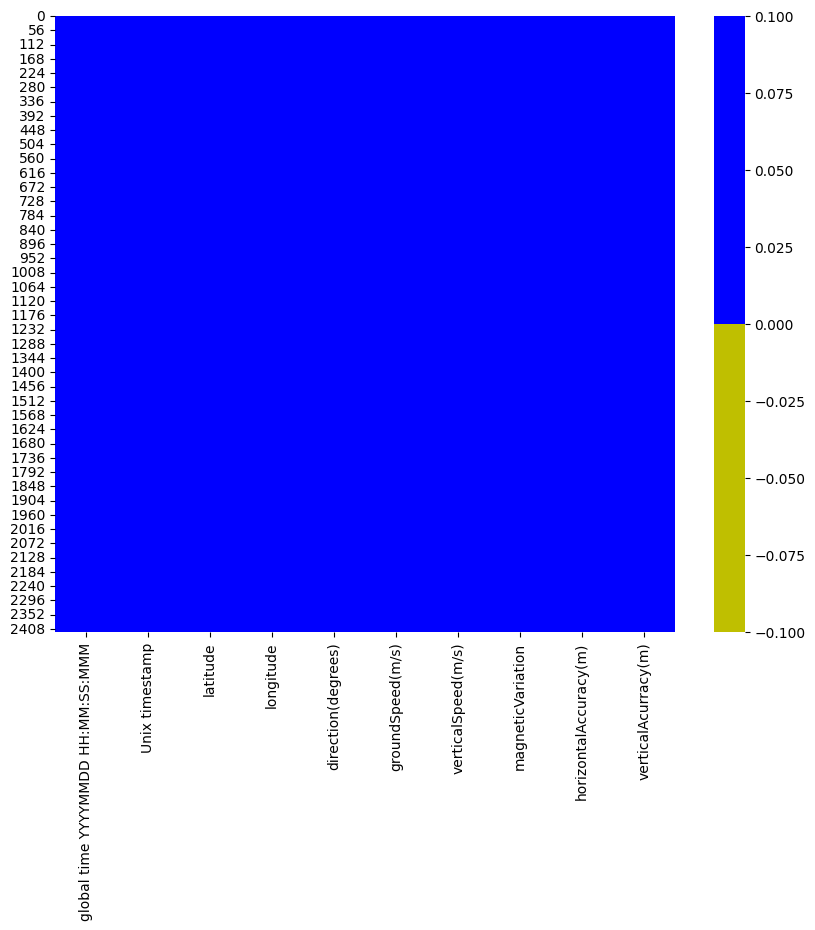

In [54]:
#visualization of the missing data heatmap
import seaborn as sns

plt.figure(figsize=(10,8))

cols = dt_GNSS.columns[:]
colors = ['y','b']
sns.heatmap(dt_GNSS[cols].isna(), cmap= sns.color_palette(colors))

<AxesSubplot: >

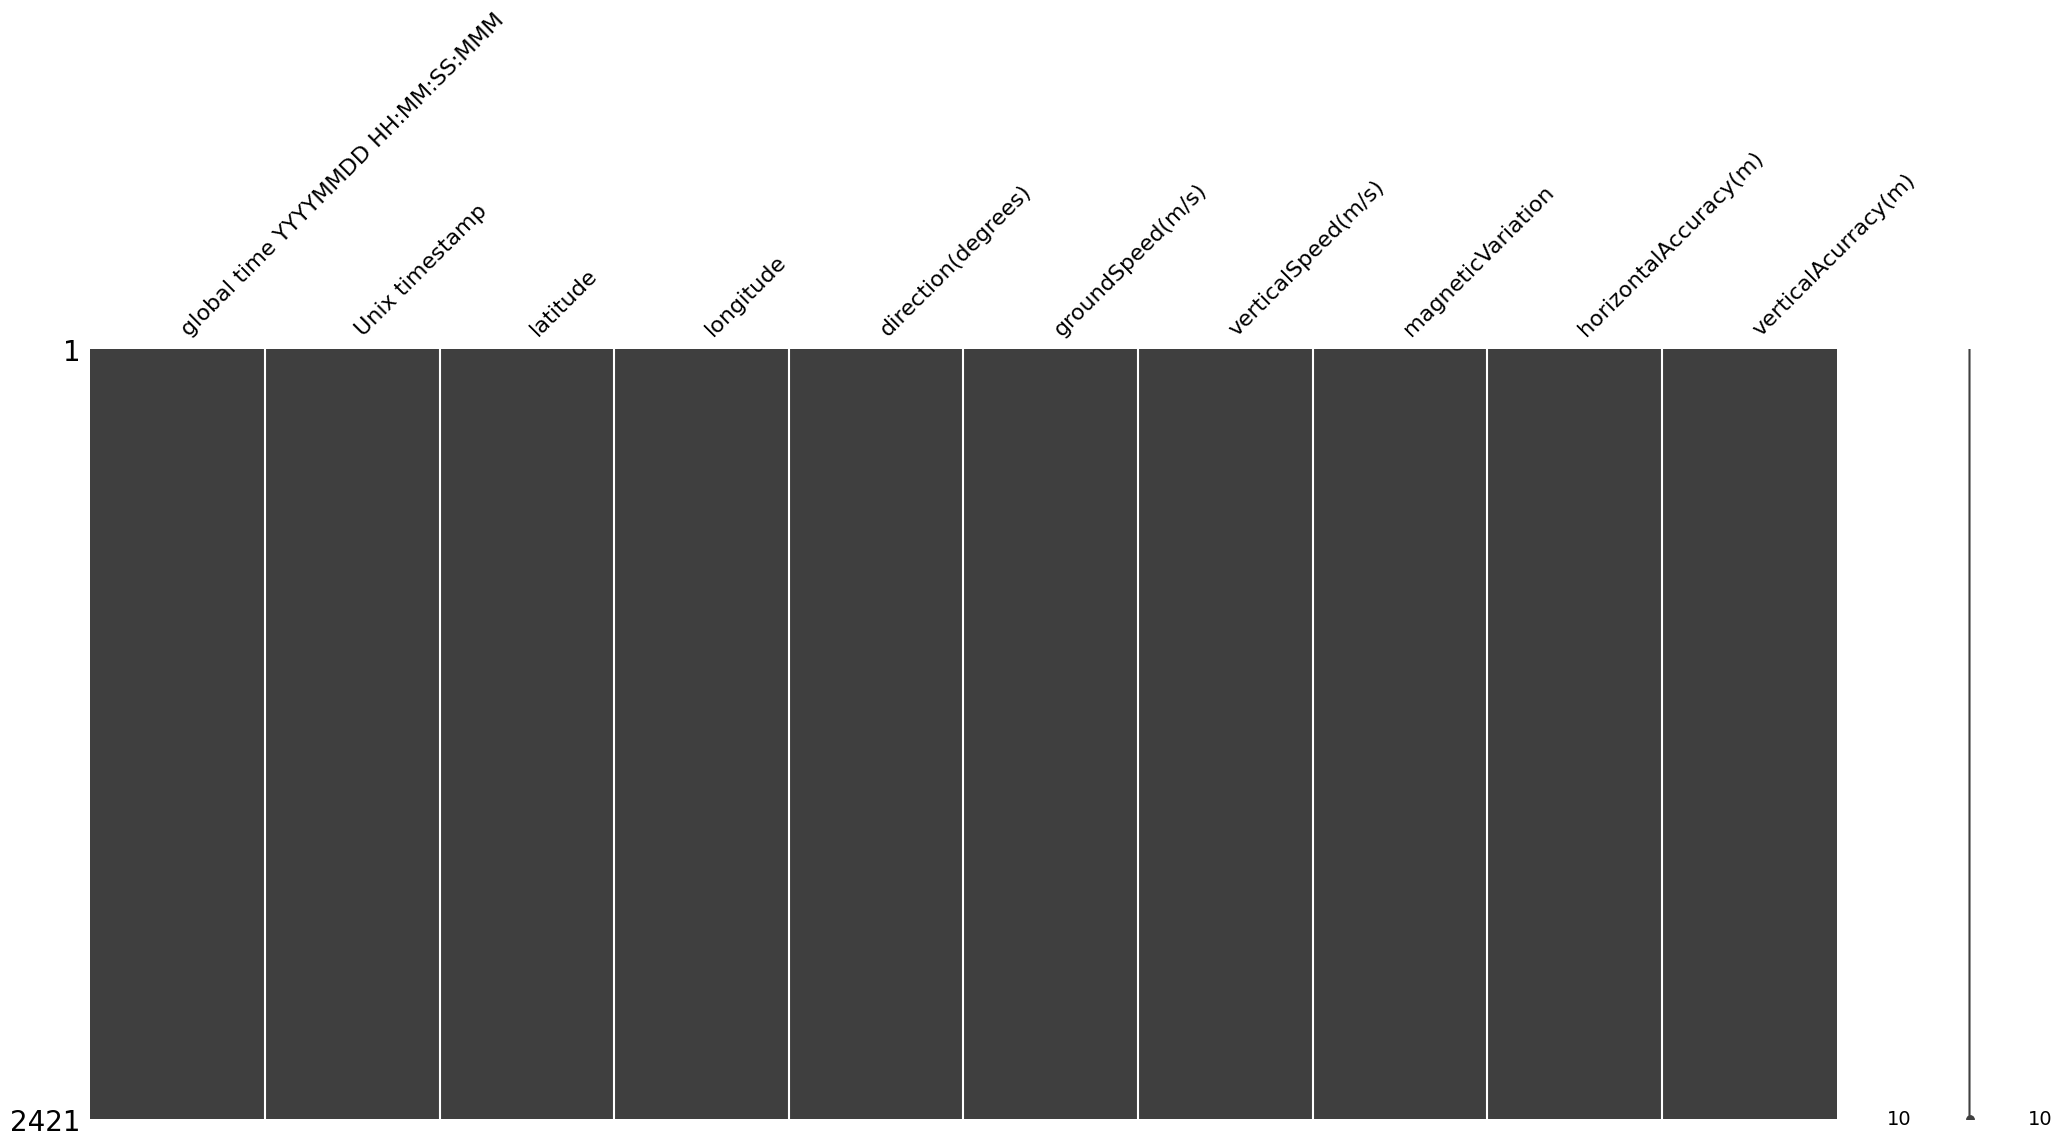

In [55]:
# other visualization of missing data
import missingno as msno
msno.matrix(dt_GNSS.iloc[:,:])

<AxesSubplot: >

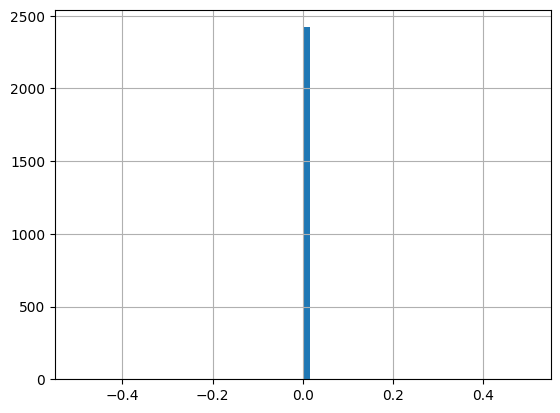

In [56]:
missing_row = dt_GNSS.isna().sum(axis='columns')
missing_row.hist(bins=60)

In [57]:
# mean of missing data by rows
pct_missing = dt_GNSS.isna().mean()
pct_missing[:]

global time YYYYMMDD HH:MM:SS:MMM    0.0
Unix timestamp                       0.0
latitude                             0.0
longitude                            0.0
direction(degrees)                   0.0
groundSpeed(m/s)                     0.0
verticalSpeed(m/s)                   0.0
magneticVariation                    0.0
horizontalAccuracy(m)                0.0
verticalAcurracy(m)                  0.0
dtype: float64

In [58]:
#droping columns with more missing data
dt_GNSS_less_cols = dt_GNSS.loc[:,pct_missing<=.3].copy()
dt_GNSS_less_cols.shape
#option two
# dt_GNSS.drop(columns=pct_missing[pct_missing>.3].index)

(2421, 10)

In [59]:
# droping rows with missing data
dt_GNSS_less_missing_rows = dt_GNSS[missing_row>8].copy()
dt_GNSS_less_missing_rows.shape

(0, 10)

In [60]:
dt_GNSS_copy = dt_GNSS.copy()
most_freq = dt_GNSS_copy[non_numeric_col].describe().loc['top']
most_freq

global time YYYYMMDD HH:MM:SS:MMM    20750929 09:02:17:807
Name: top, dtype: object

In [61]:
med = dt_GNSS_copy[numeric_col].median()
med

Unix timestamp           3.336975e+12
latitude                 1.232390e+01
longitude                8.360000e+01
direction(degrees)       0.000000e+00
groundSpeed(m/s)         5.600000e+00
verticalSpeed(m/s)       0.000000e+00
magneticVariation        0.000000e+00
horizontalAccuracy(m)    1.500000e+00
verticalAcurracy(m)      2.000000e+00
dtype: float64

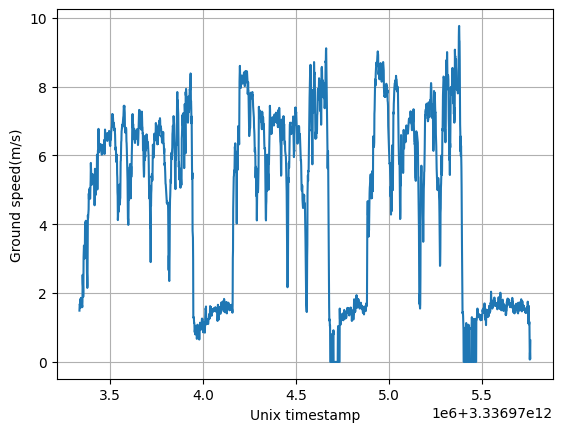

In [62]:
plt.plot(dt_GNSS['Unix timestamp'],dt_GNSS['groundSpeed(m/s)'])
plt.xlabel('Unix timestamp')
plt.ylabel('Ground speed(m/s)')
plt.grid()

In [63]:
#fig1 = plt.figure()
#ax1 = plt.axes(projection='3d')
#ax1.plot3D(dt_GNSS['Unix timestamp'].head(50),dt_GNSS['latitude'].head(50),
#dt_GNSS['longitude'].head(50))

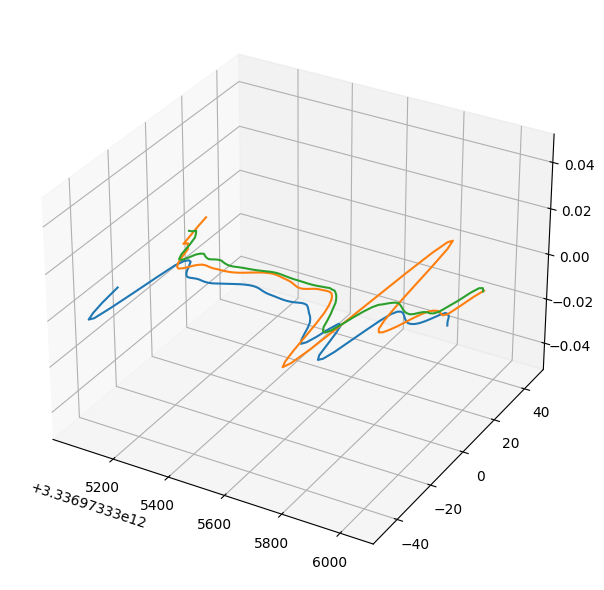

In [64]:
plt.rcParams["figure.figsize"] = [12,6]
plt.rcParams["figure.autolayout"] = True
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
x2 = dt_FrontLeft['accX'].head(100)
y2 = dt_FrontLeft['accY'].head(100)
z2 = dt_FrontLeft['accZ'].head(100)
t2 = dt_FrontLeft['Unix timestamp'].head(100)
img21 = ax2.plot(t2, x2)
img22 = ax2.plot(t2, y2)
img23 = ax2.plot(t2, z2)
plt.show()